### 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import pickle 
import json

import warnings 
warnings.filterwarnings('ignore')

### 2. Data Gathering

In [70]:
df1 = pd.read_csv('salary_data.csv')
df1.head(10)

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687
5,13,7,1,4,113993.235853
6,5,0,1,4,70804.597240
7,7,1,2,4,75522.598410
8,10,0,4,0,87484.772023
9,3,0,1,1,58830.902551


In [71]:
df1.columns

Index(['Total Experience', 'Team Lead Experience',
       'Project Manager Experience', 'Certifications', 'Salary'],
      dtype='object')

In [73]:
df = df1.rename({'Total Experience':'Total_Experience','Team Lead Experience':'Team_Lead_Experience',
          'Project Manager Experience':'Project_Manager_Experience'},axis=1)
df

,Total_Experience,Team_Lead_Experience,Project_Manager_Experience,Certifications,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687
...,...,...,...,...,...
995,8,1,6,4,90941.688891
996,12,3,1,2,92074.890941
997,14,10,1,2,115914.944924
998,7,5,0,2,82706.285700


### 3. Exploratory Data Analysis(EDA)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_Experience            1000 non-null   int64  
 1   Team_Lead_Experience        1000 non-null   int64  
 2   Project_Manager_Experience  1000 non-null   int64  
 3   Certifications              1000 non-null   int64  
 4   Salary                      1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [75]:
df.isna().sum()

Total_Experience              0
Team_Lead_Experience          0
Project_Manager_Experience    0
Certifications                0
Salary                        0
dtype: int64

### 3.1 Total_Experience

<Axes: xlabel='Total_Experience'>

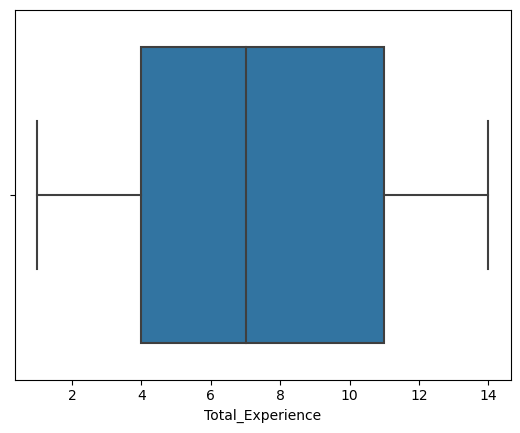

In [76]:
sns.boxplot(x=df['Total_Experience'])

### 3.2 Team_Lead_Experience

<Axes: xlabel='Team_Lead_Experience'>

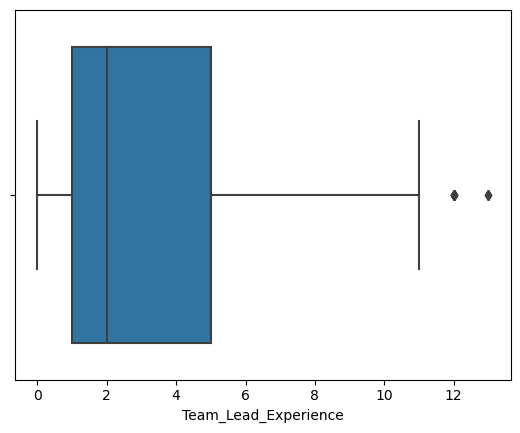

In [77]:
sns.boxplot(x=df['Team_Lead_Experience'])

In [78]:
q1 = df['Team_Lead_Experience'].quantile(0.25)
q3 = df['Team_Lead_Experience'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

11.0

In [79]:
df['Team_Lead_Experience'] = np.where(df['Team_Lead_Experience'] > upper_limit, upper_limit, df['Team_Lead_Experience'])

### 3.3 Project_Manager_Experience

<Axes: xlabel='Project_Manager_Experience'>

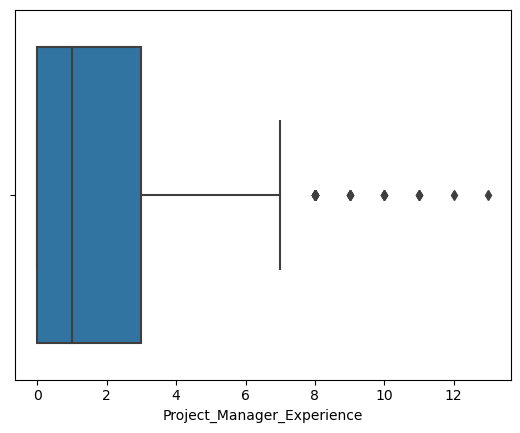

In [80]:
sns.boxplot(x=df['Project_Manager_Experience'])

In [81]:
q1 = df['Project_Manager_Experience'].quantile(0.25)
q3 = df['Project_Manager_Experience'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

7.5

In [82]:
df['Project_Manager_Experience'] = np.where(df['Project_Manager_Experience'] > upper_limit, upper_limit,
                                            df['Project_Manager_Experience'])

### 3.4 Certifications

<Axes: xlabel='Certifications'>

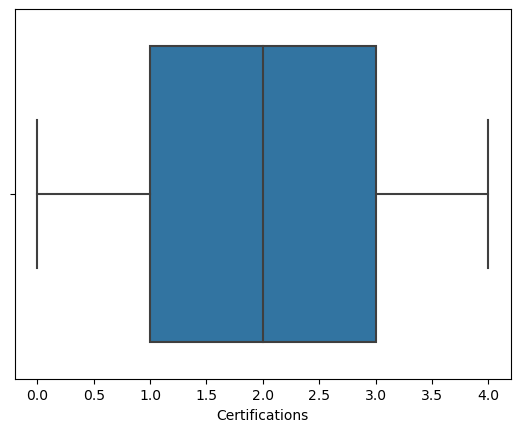

In [83]:
sns.boxplot(x=df['Certifications'])

### 4. Train Test Split

In [84]:
x = df.drop('Salary', axis=1)
y = df['Salary']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

### 5. Model Building

In [85]:
def model_building(algo,x,y):
    model = algo
    model.fit(x,y)
    return model
lr_model = model_building(LinearRegression(),x_train,y_train)
lr_model
    

LinearRegression()

### 6.Evaluation

In [86]:
def evaluation(string, model, ind_var, act):
    print(string.center(50,'*')) 
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(act, pred)
    print('MSE :', mse)
    
    rmse = np.sqrt(mse)
    print('RMSE :', rmse)
    
    mae = mean_absolute_error(act, pred)
    print('MAE :', mae)
    
    r2_val = r2_score(act, pred)
    print('R-Squared Value :', r2_val)
    
evaluation('Testing Data Evaluation', lr_model, x_test, y_test)
print()
evaluation('Training Data Evaluation', lr_model, x_train, y_train)

*************Testing Data Evaluation**************
MSE : 28020762.04593447
RMSE : 5293.464087526661
MAE : 4189.502070354393
R-Squared Value : 0.917991416428334

*************Training Data Evaluation*************
MSE : 23130333.52357793
RMSE : 4809.400536821396
MAE : 3846.924541956734
R-Squared Value : 0.9297564950002801


### Testing on Single Row

In [87]:
x.head(1).T

,0
Total_Experience,7.0
Team_Lead_Experience,2.0
Project_Manager_Experience,4.0
Certifications,1.0


In [88]:
Total_Experience = 4.0
Team_Lead_Experience = 0.0
Project_Manager_Experience = 2.0
Certifications = 3.0

In [89]:
test_array = np.zeros(x.shape[1])
test_array[0] =  Total_Experience
test_array[1] = Team_Lead_Experience
test_array[2] = Project_Manager_Experience
test_array[3] = Certifications
test_array

array([4., 0., 2., 3.])

In [90]:
result = lr_model.predict([test_array])[0]
print(f'Salary Prediction: {round(result,2)}')

Salary Prediction: 65533.79


In [92]:
column_names = x.columns
column_names

Index(['Total_Experience', 'Team_Lead_Experience',
       'Project_Manager_Experience', 'Certifications'],
      dtype='object')

In [93]:
project_data = {'columns': list(column_names)}
project_data

{'columns': ['Total_Experience',
  'Team_Lead_Experience',
  'Project_Manager_Experience',
  'Certifications']}

### 7.Saving Model and JSON

In [91]:
with open('Salary_Pred_LrModel.pkl', 'wb') as f:
    pickle.dump(lr_model,f)

In [94]:
with open('project_data.json', 'w') as f:
    json.dump(project_data,f)